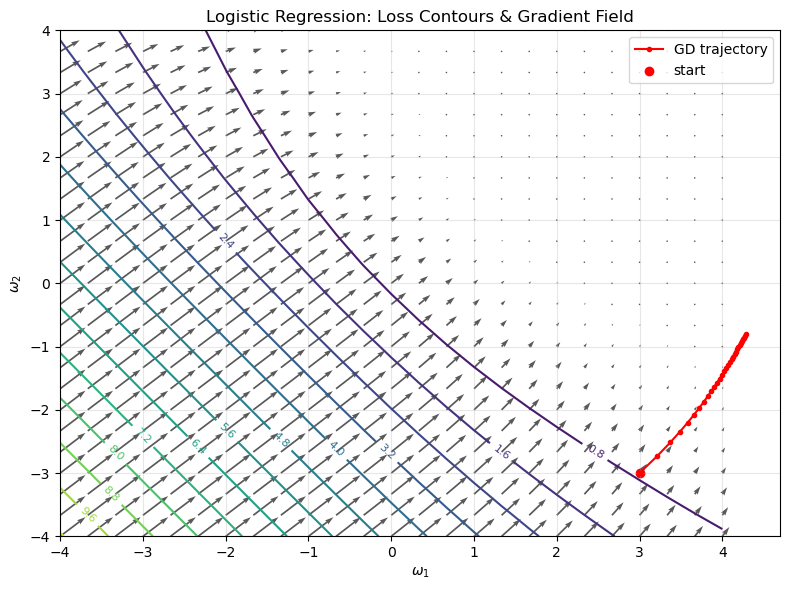

Saved: figs/LR_vectorfield.png


In [1]:
# ================================================================
# LR-gradient-field.ipynb -- Gradient Field Visualization for LR
# ================================================================

import numpy as np
import matplotlib.pyplot as plt

# Make figure directory
import os
os.makedirs("figs", exist_ok=True)

# ------------------------------------------------
# 1. Generate simple 2D linearly separable dataset
# ------------------------------------------------
np.random.seed(0)

N = 80
mean_pos = np.array([1.5, 1.5])
mean_neg = np.array([-1.5, -1.0])

X_pos = mean_pos + 0.5*np.random.randn(N//2, 2)
X_neg = mean_neg + 0.5*np.random.randn(N//2, 2)

X = np.vstack([X_pos, X_neg])
y = np.hstack([np.ones(N//2), np.zeros(N//2)])

# ------------------------------------------------
# 2. Logistic regression utilities
# ------------------------------------------------

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def loss(w):
    z = X @ w
    p = sigmoid(z)
    return -np.mean( y*np.log(p + 1e-12) + (1-y)*np.log(1-p + 1e-12) )

def grad(w):
    z = X @ w
    p = sigmoid(z)
    return (1/len(X)) * X.T @ (p - y)

# ------------------------------------------------
# 3. Grid for visualization
# ------------------------------------------------
W1, W2 = np.meshgrid(
    np.linspace(-4, 4, 25),
    np.linspace(-4, 4, 25)
)

LW = np.zeros_like(W1)
G1 = np.zeros_like(W1)
G2 = np.zeros_like(W1)

for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        w = np.array([W1[i,j], W2[i,j]])
        LW[i,j] = loss(w)
        g = grad(w)
        G1[i,j] = -g[0]       # gradient descent direction
        G2[i,j] = -g[1]

# ------------------------------------------------
# 4. Perform discrete GD for trajectory
# ------------------------------------------------
w = np.array([3.0, -3.0])   # starting point
traj = [w.copy()]
eta = 0.5

for k in range(30):
    w = w - eta * grad(w)
    traj.append(w.copy())

traj = np.array(traj)

# ------------------------------------------------
# 5. Plotting
# ------------------------------------------------
plt.figure(figsize=(8,6))
CS = plt.contour(W1, W2, LW, levels=15, cmap="viridis")
plt.clabel(CS, inline=True, fontsize=8)

plt.quiver(W1, W2, G1, G2, color="black", alpha=0.65)

plt.plot(traj[:,0], traj[:,1], 'r.-', label="GD trajectory")
plt.scatter(traj[0,0], traj[0,1], color="red", label="start")
plt.title("Logistic Regression: Loss Contours & Gradient Field")
plt.xlabel("$\omega_1$")
plt.ylabel("$\omega_2$")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig("figs/LR_vectorfield.png", dpi=200)
plt.show()

print("Saved: figs/LR_vectorfield.png")


Starting point w0 chosen at max |grad|: [-4. -4.]


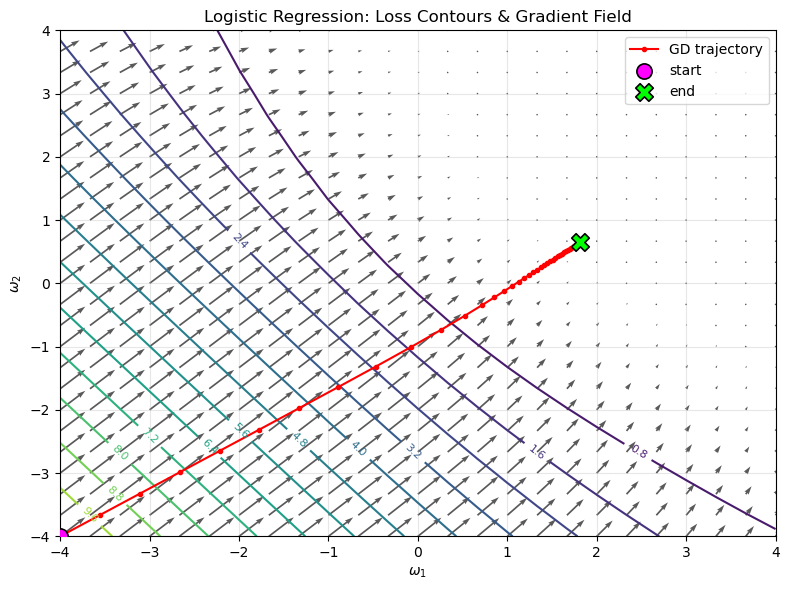

Saved: figs/LR_vectorfield.png


In [2]:
# ================================================================
# LR-gradient-field.ipynb -- Gradient Field Visualization for LR
# (updated: starting point chosen where gradient is largest)
# ================================================================

import numpy as np
import matplotlib.pyplot as plt

import os
os.makedirs("figs", exist_ok=True)

# ------------------------------------------------
# 1. Generate simple 2D linearly separable dataset
# ------------------------------------------------
np.random.seed(0)

N = 80
mean_pos = np.array([1.5, 1.5])
mean_neg = np.array([-1.5, -1.0])

X_pos = mean_pos + 0.5*np.random.randn(N//2, 2)
X_neg = mean_neg + 0.5*np.random.randn(N//2, 2)

X = np.vstack([X_pos, X_neg])
y = np.hstack([np.ones(N//2), np.zeros(N//2)])

# ------------------------------------------------
# 2. Logistic regression utilities
# ------------------------------------------------

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def loss(w):
    z = X @ w
    p = sigmoid(z)
    return -np.mean(
        y*np.log(p + 1e-12) + (1-y)*np.log(1-p + 1e-12)
    )

def grad(w):
    z = X @ w
    p = sigmoid(z)
    return (1/len(X)) * X.T @ (p - y)

# ------------------------------------------------
# 3. Grid for visualization
# ------------------------------------------------
W1, W2 = np.meshgrid(
    np.linspace(-4, 4, 25),
    np.linspace(-4, 4, 25)
)

LW = np.zeros_like(W1)
G1 = np.zeros_like(W1)
G2 = np.zeros_like(W1)

for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        w = np.array([W1[i, j], W2[i, j]])
        LW[i, j] = loss(w)
        g = grad(w)
        G1[i, j] = -g[0]   # gradient descent direction
        G2[i, j] = -g[1]

# ------------------------------------------------
# 4. Choose a starting point where gradient is large
# ------------------------------------------------
Gnorm = np.sqrt(G1**2 + G2**2)
idx_max = np.argmax(Gnorm)
i_max, j_max = np.unravel_index(idx_max, Gnorm.shape)

w0 = np.array([W1[i_max, j_max], W2[i_max, j_max]])
print("Starting point w0 chosen at max |grad|:", w0)

# ------------------------------------------------
# 5. Perform discrete GD for trajectory
# ------------------------------------------------
w = w0.copy()
traj = [w.copy()]

eta = 0.3  # a bit smaller for nicer path, can tweak
n_steps = 40

for k in range(n_steps):
    w = w - eta * grad(w)
    traj.append(w.copy())

traj = np.array(traj)

# ------------------------------------------------
# 6. Plotting
# ------------------------------------------------
plt.figure(figsize=(8, 6))

# Loss contours
CS = plt.contour(W1, W2, LW, levels=15, cmap="viridis")
plt.clabel(CS, inline=True, fontsize=8)

# Gradient field
plt.quiver(W1, W2, G1, G2, color="black", alpha=0.65)

# GD trajectory
plt.plot(traj[:, 0], traj[:, 1], 'r.-', label="GD trajectory", zorder=3)

# Start point (large magenta circle)
plt.scatter(
    traj[0, 0], traj[0, 1],
    color="magenta", s=120, marker="o",
    edgecolors="black", linewidths=1.2,
    label="start", zorder=4
)

# End point (large green X)
plt.scatter(
    traj[-1, 0], traj[-1, 1],
    color="lime", s=160, marker="X",
    edgecolors="black", linewidths=1.2,
    label="end", zorder=4
)

plt.title("Logistic Regression: Loss Contours & Gradient Field")
plt.xlabel(r"$\omega_1$")
plt.ylabel(r"$\omega_2$")

# Make sure we see the entire grid region
plt.xlim(W1.min(), W1.max())
plt.ylim(W2.min(), W2.max())

plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig("figs/LR_vectorfield.png", dpi=200)
plt.show()

print("Saved: figs/LR_vectorfield.png")
